In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
netflix = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
netflix.info()
print(netflix.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
(7787, 12)


In [4]:
netflix.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [5]:
sum(netflix.duplicated())

0

In [6]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
netflix.director.fillna("No Director", inplace = True)
netflix.cast.fillna("No Cast", inplace = True)
netflix.country.fillna("No country", inplace = True)
netflix.dropna(subset = ["rating","date_added"],inplace = True)

In [8]:
netflix.shape

(7770, 12)

In [9]:
netflix.isnull().sum().sum()

0

In [10]:
sorted_counts = netflix['type'].value_counts()
sorted_counts

Movie      5372
TV Show    2398
Name: type, dtype: int64

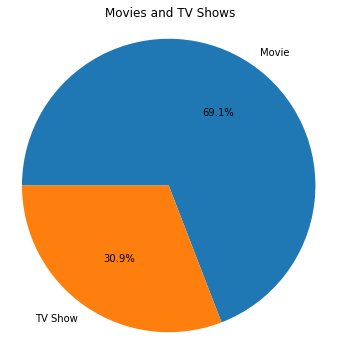

In [11]:
plt.figure(figsize = [8, 6])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 180, counterclock = False,autopct='%1.1f%%');
plt.axis('square')
plt.title("Movies and TV Shows");


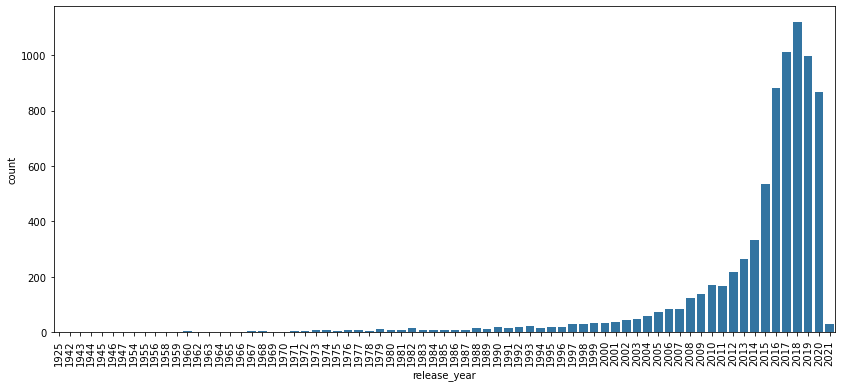

In [12]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [14, 6])
sns.countplot(data = netflix, x = 'release_year', color = base_color);
plt.xticks(rotation = 90);

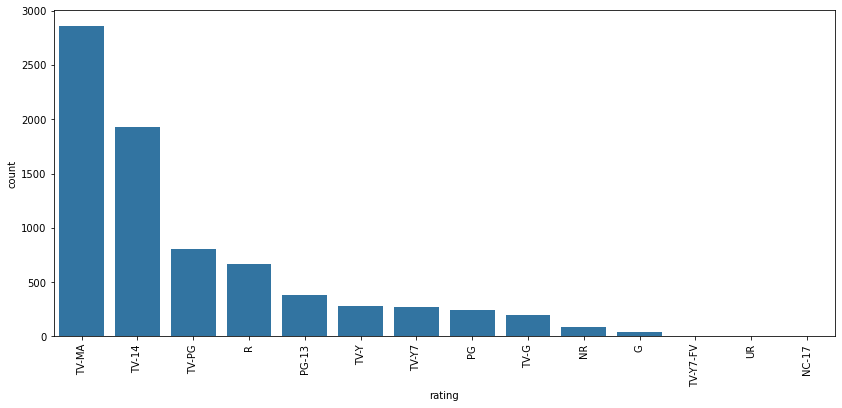

In [13]:
base_color = sns.color_palette()[0]
plt.figure(figsize = [14, 6])
sns.countplot(data = netflix, x = 'rating', color = base_color,order=netflix['rating'].value_counts().index);
plt.xticks(rotation = 90);

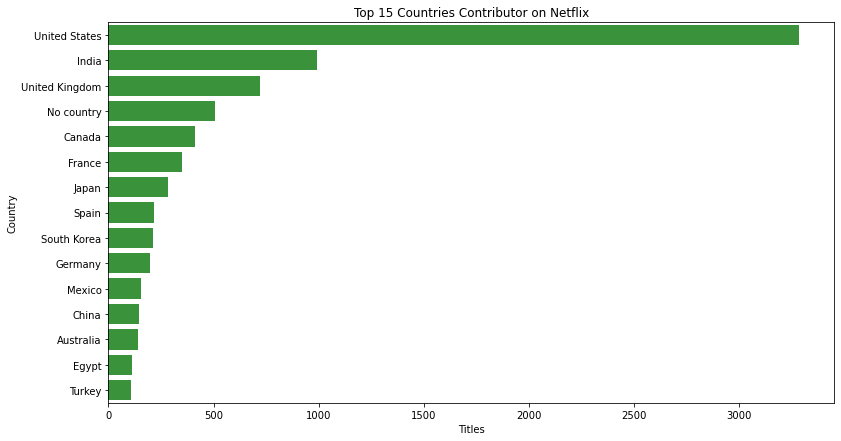

In [28]:
i_countries = netflix.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
i_countries = i_countries[i_countries != 'Country Unavailable']
plt.figure(figsize=(13, 7))
base_color = sns.color_palette()[2]
g = sns.countplot(y=i_countries,
                  order=i_countries.value_counts().index[:15],color=base_color)
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()


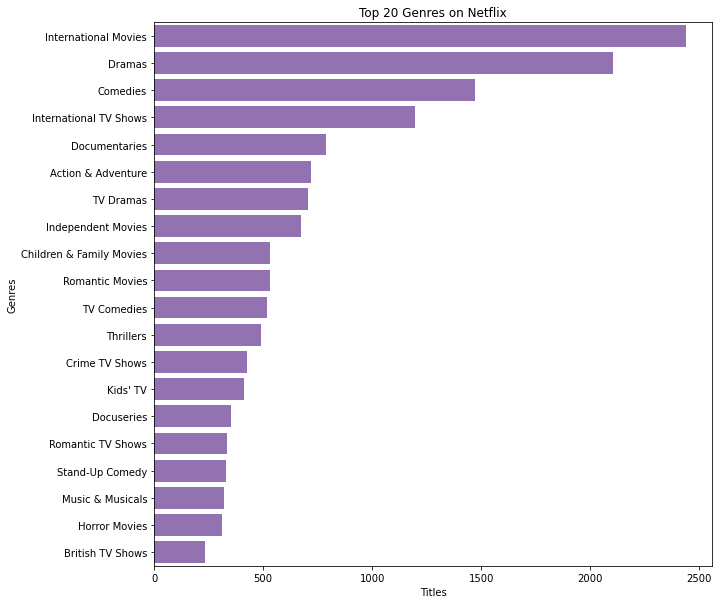

In [27]:

genres = netflix.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
base_color = sns.color_palette()[4]
g = sns.countplot(y = genres, order=genres.value_counts().index[:20],color = base_color)
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres');